In [1]:
import torch # YOLOv5 implemented using pytorch

In [2]:
# Import Necessary Library

# !pip install Progress


from IPython.display import Image  
import shutil
import os
from random import choice

from tqdm import tqdm
from ipywidgets import IntProgress
import progress 

import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

SEED = 2529
np.random.seed(SEED)                                    # for produce same result over & over, otherwise results may VARY every Run time  

In [3]:
pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/ubuntu/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
# torch.cuda.get_device_properties(0)
print("torch version : ",torch.__version__)

torch version :  1.13.1+cu117


In [5]:
! ls

'=3.3.0.dev0,'				    Music
 annotation.csv				   'NLP Assignment2.ipynb'
 app.py					    Number_detect_from_license_plate
 Char_Detect.ipynb			    Number_plate_detect
 cvat					    opt
'CV Code'				    Pictures
 Desktop				    project
 Documents				    Public
 Downloads				    PycharmProjects
 en_core_web_sm-2.2.0			    pythonpractice.ipynb
 en_core_web_sm-2.2.0.tar.gz		    skypeforlinux-64.deb
 env					    snap
 fasttext.ipynb				    Templates
 fasttext_test.txt			    Transfer-Learning-ResNet-Keras
 fasttext_train.txt			    ultralytics
 firefox.tmp				    Videos
 google-chrome-stable_current_amd64.deb     YOLO
 google-chrome-stable_current_amd64.deb.1   yolov5
 junt					    yolov8.ipynb
 labels.csv				    yolov8n.pt
 libssl1.1_1.1.1f-1ubuntu2_amd64.deb	    yolov8x-cls.pt
 LsTM.ipynb				    yolov8x-seg.pt


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_673041_1674890769218.jpg
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_668817_16746489680662.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_669024_1674654658117.jpg
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_669357_1674664799826.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/164_677208_1675139113255.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_669130_1674657550498.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_669027_1674654741434.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_669117_1674657190518.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_672268_1674828706302.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_668794_1674648372957.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_671280_1674807846309.txt
/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/165_669408_167466934

In [7]:
! dir

=3.3.0.dev0,				  Music
annotation.csv				  NLP\ Assignment2.ipynb
app.py					  Number_detect_from_license_plate
Char_Detect.ipynb			  Number_plate_detect
cvat					  opt
CV\ Code				  Pictures
Desktop					  project
Documents				  Public
Downloads				  PycharmProjects
en_core_web_sm-2.2.0			  pythonpractice.ipynb
en_core_web_sm-2.2.0.tar.gz		  skypeforlinux-64.deb
env					  snap
fasttext.ipynb				  Templates
fasttext_test.txt			  Transfer-Learning-ResNet-Keras
fasttext_train.txt			  ultralytics
firefox.tmp				  Videos
google-chrome-stable_current_amd64.deb	  YOLO
google-chrome-stable_current_amd64.deb.1  yolov5
junt					  yolov8.ipynb
labels.csv				  yolov8n.pt
libssl1.1_1.1.1f-1ubuntu2_amd64.deb	  yolov8x-cls.pt
LsTM.ipynb				  yolov8x-seg.pt


## Clone The Repository

In [8]:
# cloning the yolo repository

# !git clone https://github.com/ultralytics/yolov5.git

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git
               

In [9]:
! dir

=3.3.0.dev0,				  Music
annotation.csv				  NLP\ Assignment2.ipynb
app.py					  Number_detect_from_license_plate
Char_Detect.ipynb			  Number_plate_detect
cvat					  opt
CV\ Code				  Pictures
Desktop					  project
Documents				  Public
Downloads				  PycharmProjects
en_core_web_sm-2.2.0			  pythonpractice.ipynb
en_core_web_sm-2.2.0.tar.gz		  skypeforlinux-64.deb
env					  snap
fasttext.ipynb				  Templates
fasttext_test.txt			  Transfer-Learning-ResNet-Keras
fasttext_train.txt			  ultralytics
firefox.tmp				  Videos
google-chrome-stable_current_amd64.deb	  YOLO
google-chrome-stable_current_amd64.deb.1  yolov5
junt					  yolov8.ipynb
labels.csv				  yolov8n.pt
libssl1.1_1.1.1f-1ubuntu2_amd64.deb	  yolov8x-cls.pt
LsTM.ipynb				  yolov8x-seg.pt


In [10]:
%cd yolov5/
!pwd

/home/ubuntu/yolov5
/home/ubuntu/yolov5


In [10]:
! dir

benchmarks.py	 detect.py    README.zh-CN.md	utils
CITATION.cff	 export.py    requirements.txt	val.py
classify	 hubconf.py   runs		yolov5s6.pt
CONTRIBUTING.md  LICENSE      segment		yolov5s.pt
data		 models       setup.cfg
dataset		 __pycache__  train.py
dataset.yaml	 README.md    tutorial.ipynb


In [11]:
# pip install -r requirements.txt wandb  # install (add W&B for logging) 
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Splitting The data According to the YOLO Format

In [12]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
# train_path = r'/home/ubuntu/yolo/YOLOv5_try/images/train'
# val_path = r'/home/ubuntu/yolo/YOLOv5_try/images/val'

# images are initially stored here in kaggle
crs_path = r'/home/ubuntu/Downloads/Number_Annotate_Data/Final_data/'

# deciding the ration in which the dataset needs to be divided
train_ratio = 0.87
val_ratio = 0.13

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname, dirs, files) in os.walk(crs_path):
    for filename in files:
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs) * train_ratio)
count_for_val = int(len(imgs) * val_ratio)
print("Training images are : ",count_for_train)
print("Validation images are : ",count_for_val)

Training images are :  789
Validation images are :  118


In [14]:
# creation of directories in working path

train_image_path = r'/home/ubuntu/yolov5/dataset/train/images'
train_label_path = r'/home/ubuntu/yolov5/dataset/train/labels'
val_image_path   = r'/home/ubuntu/yolov5/dataset/val/images'
val_label_path   = r'/home/ubuntu/yolov5/dataset/val/labels'

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

## Copying the data(both image & txt) into train file

In [15]:
# For training images
# Copying the images from input directory to working directory -> dataset/images/train
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)

## Copying the data(both image & txt) into val file

In [13]:
# For test images
for x in range(count_for_val):
    file_jpg = choice(imgs)
    
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

NameError: name 'val_image_path' is not defined

##  YOLOv5s6 backbone consists of 12 layers,
## YOLOv5s backbone consists of 24 layers
* To freeze the full model except for the final output convolution layers in Detect(),
* we set freeze list to contain all modules with 'model.0.' - 'model.23.'in their names
* python train.py --freeze 24


# python train.py -h
usage: train.py [-h] [--model_type MODEL_TYPE] [--anchors_path ANCHORS_PATH]
                [--model_input_shape MODEL_INPUT_SHAPE]
                [--weights_path WEIGHTS_PATH]
                [--annotation_file ANNOTATION_FILE]
                [--val_annotation_file VAL_ANNOTATION_FILE]
                [--val_split VAL_SPLIT] [--classes_path CLASSES_PATH]
                [--batch_size BATCH_SIZE] [--optimizer {adam,rmsprop,sgd}]
                [--learning_rate LEARNING_RATE]
                [--average_type {None,ema,swa,lookahead}]
                [--decay_type {None,cosine,exponential,polynomial,piecewise_constant}]
                [--transfer_epoch TRANSFER_EPOCH]
                [--freeze_level {None,0,1,2}] [--init_epoch INIT_EPOCH]
                [--total_epoch TOTAL_EPOCH] [--multiscale]
                [--rescale_interval RESCALE_INTERVAL]
                [--enhance_augment {None,mosaic}]
                [--label_smoothing LABEL_SMOOTHING] [--multi_anchor_assign]
                [--elim_grid_sense] [--data_shuffle] [--gpu_num GPU_NUM]
                [--model_pruning] [--eval_online]
                [--eval_epoch_interval EVAL_EPOCH_INTERVAL]
                [--save_eval_checkpoint]

optional arguments:
  -h, --help            show this help message and exit
  --model_type MODEL_TYPE
                        YOLO model type: yolo3_mobilenet_lite/tiny_yolo3_mobil
                        enet/yolo3_darknet/..., default=yolo3_mobilenet_lite
  --anchors_path ANCHORS_PATH
                        path to anchor definitions,
                        default=configs/yolo3_anchors.txt
  --model_input_shape MODEL_INPUT_SHAPE
                        Initial model image input shape as <height>x<width>,
                        default=416x416
  --weights_path WEIGHTS_PATH
                        Pretrained model/weights file for fine tune
  --annotation_file ANNOTATION_FILE
                        train annotation txt file, default=trainval.txt
  --val_annotation_file VAL_ANNOTATION_FILE
                        val annotation txt file, default=None
  --val_split VAL_SPLIT
                        validation data persentage in dataset if no val
                        dataset provide, default=0.1
  --classes_path CLASSES_PATH
                        path to class definitions,
                        default=configs/voc_classes.txt
  --batch_size BATCH_SIZE
                        Batch size for train, default=16
  --optimizer {adam,rmsprop,sgd}
                        optimizer for training (adam/rmsprop/sgd),
                        default=adam
  --learning_rate LEARNING_RATE
                        Initial learning rate, default=0.001
  --average_type {None,ema,swa,lookahead}
                        weights average type, default=None
  --decay_type {None,cosine,exponential,polynomial,piecewise_constant}
                        Learning rate decay type, default=None
  --transfer_epoch TRANSFER_EPOCH
                        Transfer training (from Imagenet) stage epochs,
                        default=20
  --freeze_level {None,0,1,2}
                        Freeze level of the model in transfer training stage.
                        0:NA/1:backbone/2:only open prediction layer
  --init_epoch INIT_EPOCH
                        Initial training epochs for fine tune training,
                        default=0
  --total_epoch TOTAL_EPOCH
                        Total training epochs, default=250
  --multiscale          Whether to use multiscale training
  --rescale_interval RESCALE_INTERVAL
                        Number of iteration(batches) interval to rescale input
                        size, default=10
  --enhance_augment {None,mosaic}
                        enhance data augmentation type (None/mosaic),
                        default=None
  --label_smoothing LABEL_SMOOTHING
                        Label smoothing factor (between 0 and 1) for
                        classification loss, default=0
  --multi_anchor_assign
                        Assign multiple anchors to single ground truth
  --elim_grid_sense     Eliminate grid sensitivity
  --data_shuffle        Whether to shuffle train/val data for cross-validation
  --gpu_num GPU_NUM     Number of GPU to use, default=1
  --model_pruning       Use model pruning for optimization, only for TF 1.x
  --eval_online         Whether to do evaluation on validation dataset during
                        training
  --eval_epoch_interval EVAL_EPOCH_INTERVAL
                        Number of iteration(epochs) interval to do evaluation,
                        default=10
  --save_eval_checkpoint
                        Whether to save checkpoint with best evaluation result

In [ ]:
# hyp.scratch.yaml will be automatically used by default
# python train.py --hyp hyp.custom.yaml

# --evolve 1000 default 300 (--cache --evolve)

# --imgsz IMGSZ
# --img-size 640

In [16]:
!python3 /home/ubuntu/yolov5/train.py --img 512 --batch 2 --epochs 50 --data dataset.yaml --weights yolov5s.pt --freeze 10 --cache --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=51, batch_size=2, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.10.6 torch-1.13.1+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0

train: Scanning /home/ubuntu/yolov5/dataset/train/labels... 826 images, 1 backgr
train: New cache created: /home/ubuntu/yolov5/dataset/train/labels.cache
train: Caching images (0.2GB ram): 100%|██████████| 826/826 [00:00<00:00, 2612.6
val: Scanning /home/ubuntu/yolov5/dataset/val/labels... 141 images, 0 background
val: WARNING ⚠️ /home/ubuntu/yolov5/dataset/val/images/165_671229_1674806840888.jpg: 1 duplicate labels removed
val: New cache created: /home/ubuntu/yolov5/dataset/val/labels.cache
val: Caching images (0.0GB ram): 100%|██████████| 141/141 [00:00<00:00, 1617.85i

AutoAnchor: 6.21 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/exp4/labels.jpg... 
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/train/exp4
Starting training for 51 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/50         0G    0.09907     0.1081    0.091


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/50         0G    0.04256    0.07256    0.07502         41        512: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.784      0.169      0.164       0.11

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      11/50         0G    0.04062    0.07074    0.07433         63        512: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.798      0.172      0.174      0.112

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      12/50         0G     0.0406    0.07102    0.07373         40        512: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.803      0.183      0.186      0.116

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      35/50         0G    0.03371    0.06342     0.0515         45        512: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350       0.75      0.338      0.356      0.254

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      36/50         0G    0.03409    0.06655    0.05132         39        512: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.746       0.34      0.359       0.26

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      37/50         0G    0.03323    0.06484    0.05037         51        512: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.735      0.346      0.364      0.267

      Epo

Results saved to runs/train/exp4


In [21]:
# 
!python3 detect.py --source runs/train/exp/images --weights runs/train/exp4/weights/best.pt  --hide-conf --hide-labels --augment 


detect: weights=['runs/train/exp4/weights/best.pt'], source=runs/train/exp/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.10.6 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
image 1/16 /home/ubuntu/yolov5/runs/train/exp/images/5.jpg: 640x640 2 0s, 4 1s, 1 3, 4 4s, 3 6s, 2 7s, 4 8s, 2 9s, 3 As, 1 F, 625.2ms
image 2/16 /home/ubuntu/yolov5/runs/train/exp/images/7.jpg: 416x640 4 0s, 8 3s, 4 5s, 5 6s, 3 8s, 3 9s, 2 Es, 2 Fs, 360.6ms
image 3/16 /home/ubuntu/yolov5/runs/train/exp/images/9.jpg: 480x640 6 0s, 3 1s, 3 2s, 2 3s, 2 5s, 4 8s, 5 9s, 1 

In [18]:
!python3 detect.py --source runs/train/exp/images --weights runs/train/exp4/weights/best.pt  --hide-conf --hide-labels 


detect: weights=['runs/train/exp4/weights/best.pt'], source=runs/train/exp/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.10.6 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
image 1/16 /home/ubuntu/yolov5/runs/train/exp/images/5.jpg: 640x640 2 0s, 2 1s, 1 3, 1 4, 3 6s, 2 7s, 2 8s, 2 9s, 3 As, 1 F, 176.6ms
image 2/16 /home/ubuntu/yolov5/runs/train/exp/images/7.jpg: 416x640 4 0s, 6 3s, 4 5s, 4 6s, 2 8s, 3 9s, 2 Es, 2 Fs, 113.5ms
image 3/16 /home/ubuntu/yolov5/runs/train/exp/images/9.jpg: 480x640 6 0s, 3 1s, 2 2s, 1 3, 2 5s, 4 8s, 2 9s, 141

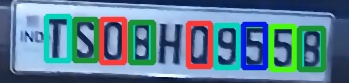

In [16]:
Image(filename = r'/home/ubuntu/yolov5/runs/detect/exp2/b.jpg', width= 616, height=800)

## Fine Tuning

In [ ]:
!python3 train.py --hyp 'hyp.finetune.yaml' --batch 16 --epochs 100 --data 'data/penguins_data.yaml' --weights 'runs_penguins/feature_extraction/weights/best.pt' --project 'runs_penguins' --name 'fine-tuning' --cache
clear_output()

## Validation

In [24]:
!python3 val.py --weights runs/train/exp4/weights/best.pt --batch 64 --data 'dataset.yaml' --task val --project 'character' --name 'validation_on_test_data' --augment

#  --task test will run metrics on your test set, if you have one. You do not have a test set defined in your 
# data.yaml, so what exactly are you expecting val.py to do here?    

val: data=dataset.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=character, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.10.6 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/ubuntu/yolov5/dataset/val/labels.cache... 141 images, 0 back
val: WARNING ⚠️ /home/ubuntu/yolov5/dataset/val/images/165_671229_1674806840888.jpg: 1 duplicate labels removed
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.779      0.339      0.417      0.309
                     0        141        145      0.788      0.966      0.941      0.734
                   

## Test with TTA
Append --augment to any existing val.py command to enable Test-Time Augmentation(TTA), and increase the image size by about 30% for improved results. Note that inference with TTA enabled will typically take about 2-3X the time of normal inference as the images are being left-right flipped and processed at 3 different resolutions, with the outputs merged before NMS. Part of the speed decrease is simply due to larger image sizes (832 vs 640), while part is due to the actual TTA operations.

In [23]:
!python3 val.py --weights runs/train/exp4/weights/best.pt --data 'dataset.yaml'  --augment 

# --half # giving some error
# when I enabled --half with val.py on V100 GPU, the mAP@.5 increased by 0.7 and mAP@.5:.95 decreased by 1.4. 
# Is it something expected to observe? Does --half focuses on improving mAP0.5 at the expense of reducing mAP0.5:0.95

# --iou 0.65

val: data=dataset.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.10.6 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/ubuntu/yolov5/dataset/val/labels.cache... 141 images, 0 back
val: WARNING ⚠️ /home/ubuntu/yolov5/dataset/val/images/165_671229_1674806840888.jpg: 1 duplicate labels removed
                 Class     Images  Instances          P          R      mAP50   
                   all        141       1350      0.745      0.353      0.416       0.31
                     0        141        145      0.777      0.972      0.946       0.74
                     1        141       

In [25]:
!python3 val.py --weights runs/train/exp4/weights/best.pt --data 'dataset.yaml'  --half 

# No, we won't be implementing this with CPU. CPU does not support efficient computations with half datatype, and 
# therefore half datatype support on cpu is limited and shouldn't be relied upon.

val: data=dataset.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.10.6 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7107217 parameters, 0 gradients, 16.1 GFLOPs
val: Scanning /home/ubuntu/yolov5/dataset/val/labels.cache... 141 images, 0 back
val: WARNING ⚠️ /home/ubuntu/yolov5/dataset/val/images/165_671229_1674806840888.jpg: 1 duplicate labels removed
                 Class     Images  Instances          P          R      mAP50   
Traceback (most recent call last):
  File "/home/ubuntu/yolov5/val.py", line 409, in <module>
    main(opt)
  File "/home/ubuntu/yolov5/val.py", line 380, in main
    run(**vars(opt))
  File "/home/ubuntu/.local/lib/py

In [32]:
lst = [1,2,3,4,5,6,7,8,9]

print(lst[:-4:])


[1, 2, 3, 4, 5]


In [11]:
from kerastuner.tuners import RandomSearch , GridSearch


2023-03-06 16:01:55.712791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 16:02:00.252948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-06 16:02:00.253167: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/.local/lib/python3.10/site-packages/cv2/../../lib64

In [ ]:

tuner = RandomSearch(build_model, #this method builds the model
             hyperparameters=hp, objective='val_accuracy')

tuner.search(x=train_x, y=train_y,
             validation_data=(val_x, val_y),
             callbacks=[tensorboard_cb]